**Perform Data Exploration **
For Each Dataset
1) See head, tail, shape and describe to get basic info on the data set
2) Identify column types and range of values columns can take
3) Identify if any values are missing or need manipulations

In [3]:
import pandas as pd
import numpy as np
import os
import gc # We're gonna be clearing memory a lot
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

p = sns.color_palette()


In [4]:
#Change this to location where you have stored the data
path = '/Users/vapramod/Documents/PersonalWork/GA_DataScienceWork/DSClickPrediction_DATA/data/'
print( path + 'clicks_train.csv.zip')

/Users/vapramod/Documents/PersonalWork/GA_DataScienceWork/DSClickPrediction_DATA/data/clicks_train.csv.zip


**Understand clicks_train**

In [51]:
#Understanding clicks_train data set
clicks_train = pd.read_csv(path + 'clicks_train.csv.zip', compression='zip', header=0, sep=',', quotechar='"')

In [52]:
print( clicks_train.head())
print(clicks_train.tail())
print(clicks_train.shape)
print(clicks_train.describe())
print( clicks_train.dtypes)

   display_id   ad_id  clicked
0           1   42337        0
1           1  139684        0
2           1  144739        1
3           1  156824        0
4           1  279295        0
          display_id   ad_id  clicked
87141726    16874592  186600        0
87141727    16874593  151498        1
87141728    16874593  282350        0
87141729    16874593  521828        0
87141730    16874593  522693        0
(87141731, 3)
         display_id         ad_id       clicked
count  8.714173e+07  8.714173e+07  8.714173e+07
mean   8.443768e+06  1.903964e+05  1.936454e-01
std    4.872763e+06  1.250345e+05  3.951542e-01
min    1.000000e+00  1.000000e+00  0.000000e+00
25%    4.216023e+06  9.763400e+04  0.000000e+00
50%    8.464243e+06  1.683860e+05  0.000000e+00
75%    1.265967e+07  2.529310e+05  0.000000e+00
max    1.687459e+07  5.480190e+05  1.000000e+00
display_id    int64
ad_id         int64
clicked       int64
dtype: object


In [53]:
#Find how many null values for each column
print("How many are null")
print(clicks_train.isnull().sum())
print("\nCheck Cardinality")
print( "display_id:\t", len(clicks_train.display_id.unique()))
print( "ad_id :\t\t",len(clicks_train.ad_id .unique()))
print( "clicked:\t",len(clicks_train.clicked.unique()))

How many are null
display_id    0
ad_id         0
clicked       0
dtype: int64

Check Cardinality
display_id:	 16874593
ad_id :		 478950
clicked:	 2


In [50]:
sizes_train = clicks_train.groupby('display_id')[ 'ad_id'].count().value_counts()

In [51]:
print(sizes_train.shape)
print(sizes_train)
print(type(sizes_train))

(11,)
4     5421764
6     5005527
3     1696425
5     1438599
8     1121697
9     1044047
2      802498
10     230262
7      100677
12      12822
11        275
Name: ad_id, dtype: int64
<class 'pandas.core.series.Series'>


In [52]:
#Get the percentage
sizes_train = sizes_train / np.sum(sizes_train)
sizes_train

4     0.321297
6     0.296631
3     0.100531
5     0.085252
8     0.066473
9     0.061871
2     0.047557
10    0.013645
7     0.005966
12    0.000760
11    0.000016
Name: ad_id, dtype: float64

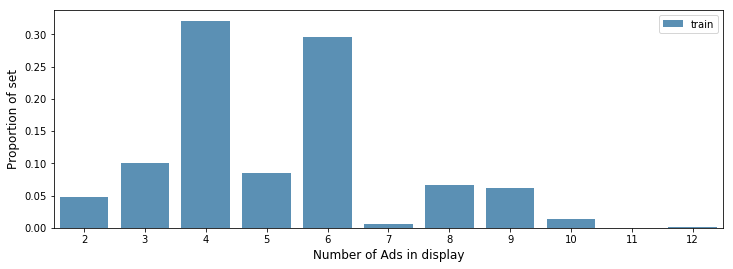

In [53]:
plt.figure(figsize=(12,4))
sns.barplot( sizes_train.index,sizes_train.values, alpha=0.8, color=p[0], label='train')
plt.legend()
plt.xlabel('Number of Ads in display', fontsize=12)
plt.ylabel('Proportion of set', fontsize=12)

**Summary of clicks_train dataset**
1) about 8.7e+7 rows for training. 
2) display_id ranges from 1 - 1.6e7 
3) ad_id ranges rom 1 - 5.4e+5
4) clicks is 0 or 1 so binary

In [39]:
clicks_test = pd.read_csv(path + 'clicks_test.csv.zip', compression='zip', header=0, sep=',', quotechar='"')

In [40]:
print( clicks_test.head())
print(clicks_test.tail())
print(clicks_test.shape)
print(clicks_test.describe())
print( clicks_test.dtypes)
#Find how many null values for each column
clicks_test.isnull().sum()

   display_id   ad_id
0    16874594   66758
1    16874594  150083
2    16874594  162754
3    16874594  170392
4    16874594  172888
          display_id   ad_id
32225157    23120125  254698
32225158    23120126   57097
32225159    23120126  145293
32225160    23120126  201649
32225161    23120126  292363
(32225162, 2)
         display_id         ad_id
count  3.222516e+07  3.222516e+07
mean   1.999773e+07  2.111462e+05
std    1.802625e+06  1.466466e+05
min    1.687459e+07  1.000000e+00
25%    1.843929e+07  1.042080e+05
50%    1.999674e+07  1.752140e+05
75%    2.155796e+07  2.858390e+05
max    2.312013e+07  5.670730e+05
display_id    int64
ad_id         int64
dtype: object


display_id    0
ad_id         0
dtype: int64

In [41]:
sizes_test = clicks_test.groupby('display_id')[ 'ad_id'].count().value_counts()


In [42]:
sizes_test = sizes_test / np.sum(sizes_test)

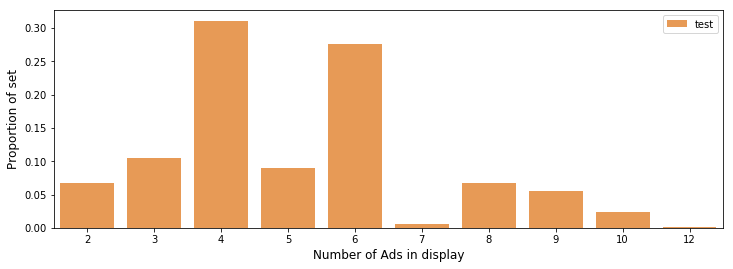

In [48]:
plt.figure(figsize=(12,4))
sns.barplot( sizes_train.index,sizes_train.values, alpha=0.8, color=p[1], label='test')
plt.legend()
plt.xlabel('Number of Ads in display', fontsize=12)
plt.ylabel('Proportion of set', fontsize=12)

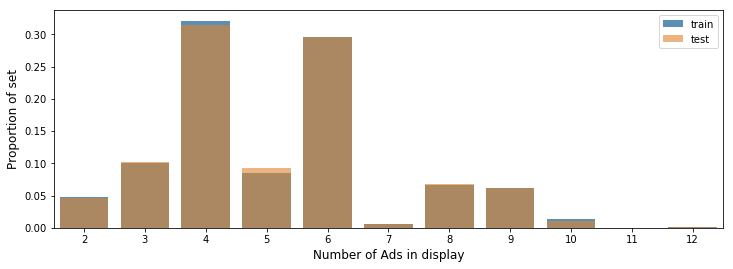

In [54]:
#Lets plot train and test together
plt.figure(figsize=(12,4))
sns.barplot(sizes_train.index, sizes_train.values, alpha=0.8, color=p[0], label='train')
sns.barplot(sizes_test.index, sizes_test.values, alpha=0.6, color=p[1], label='test')
plt.legend()
plt.xlabel('Number of Ads in display', fontsize=12)
plt.ylabel('Proportion of set', fontsize=12)

This means that the data is well split between train and test atleast in terms of number of ads for display ids

In [57]:
#Question: Check Ad usage in training set
AdUsed = clicks_train.groupby('ad_id')['ad_id'].count()


478950

In [72]:
print(len(AdUsed))
print(AdUsed.head(10))
print(AdUsed.describe())
#print(AdUsed.idxmax)

478950
ad_id
1        2
2       22
3      161
4       32
5        1
6        1
7     3406
8       28
9        3
10      81
Name: ad_id, dtype: int64
count    478950.000000
mean        181.943274
std        1910.689568
min           1.000000
25%           2.000000
50%           5.000000
75%          19.000000
max      211824.000000
Name: ad_id, dtype: float64


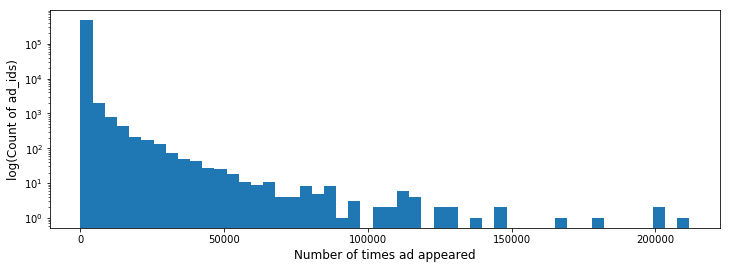

In [93]:
plt.figure(figsize=(12,4))
plt.hist(AdUsed, bins=50, log=True)
plt.xlabel('Number of times ad appeared', fontsize=12)
plt.ylabel('log(Count of ad_ids)', fontsize=12)
plt.show()

In [89]:
for i in [2, 10, 50, 100, 1000, 10000, 100000]:
    print('Ads that appear less than {} times: {}%'.format(i, round((AdUsed < i).mean()*100, 2)))

Ads that appear less than 2 times: 22.69%
Ads that appear less than 10 times: 61.74%
Ads that appear less than 50 times: 86.93%
Ads that appear less than 100 times: 91.04%
Ads that appear less than 1000 times: 97.45%
Ads that appear less than 10000 times: 99.64%
Ads that appear less than 100000 times: 99.99%


In [92]:
#To understand how mean provides %
i=200000
print(AdUsed[AdUsed > i])
print('Ads that appear greater than {} times: {}%'.format(i, round((AdUsed > i).mean()*100, 2)))

ad_id
123742    202099
173005    211824
180923    203159
Name: ad_id, dtype: int64
Ads that appear greater than 200000 times: 0.0%


In [94]:
ad_prop = len(set(clicks_test.ad_id.unique()).intersection(clicks_train.ad_id.unique())) / len(clicks_test.ad_id.unique())
print('Proportion of test ads in test set that are in training: {}%'.format(round(ad_prop * 100, 2)))

Proportion of test ads in test set that are in training: 82.87%


In [1]:
try:del clicks_train,clicks_test 
except:pass;gc.collect()

NameError: name 'gc' is not defined

**Summary of clicks_train dataset**
1) about  3.2e+7 rows for Testing. 
2) display_id ranges from 1.6e+7 - 2.3e7 
3) ad_id ranges rom 1 - 5.6e+5
4) No missing values

In [17]:
events = pd.read_csv(path + 'events.csv.zip', compression='zip', header=0, sep=',', quotechar='"')

/Applications/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [18]:
print( events.head())
print( events.tail())
print( events.shape)
print( events.describe())
print( events.dtypes)

   display_id            uuid  document_id  timestamp platform geo_location
0           1  cb8c55702adb93       379743         61        3    US>SC>519
1           2  79a85fa78311b9      1794259         81        2    US>CA>807
2           3  822932ce3d8757      1179111        182        2    US>MI>505
3           4  85281d0a49f7ac      1777797        234        2    US>WV>564
4           5  8d0daef4bf5b56       252458        338        2        SG>00
          display_id            uuid  document_id   timestamp platform  \
23120121    23120122  3b42aaa4aa8993      1827718  1295999574        1   
23120122    23120123  7efccdc2d58fd1      2984543  1295999591        2   
23120123    23120124  11f9ac8cee26f2       751048  1295999657        2   
23120124    23120125  6bbdc5756789cc       744496  1295999771        2   
23120125    23120126  b545c100626cba      2357447  1295999805        2   

         geo_location  
23120121    US>FL>571  
23120122    US>TX>623  
23120123    US>GA>524  
231

In [50]:
#Find how many null values for each column
print("How many are null")
print(events.isnull().sum())
print("\nCheck Cardinality")
print( "platform:\t", len(events.platform.unique()))
print( "display_id:\t",len(events.display_id.unique()))
print( "document_id:\t",len(events.document_id.unique()))
print( "uuid:\t\t", len(events.uuid.unique()))
print( "geo_location:\t",len(events.geo_location.unique()))
print( "timestamp:\t",len(events.timestamp.unique()))

How many are null
display_id        0
uuid              0
document_id       0
timestamp         0
platform          0
geo_location    340
dtype: int64

Check Cardinality
platform:	 4
display_id:	 23120126
document_id:	 894060
uuid:	 19794967
geo_location:	 2989
timestamp:	 22896622


In [20]:
events.platform = events.platform.astype(str)
platform_counts = events.platform.value_counts()

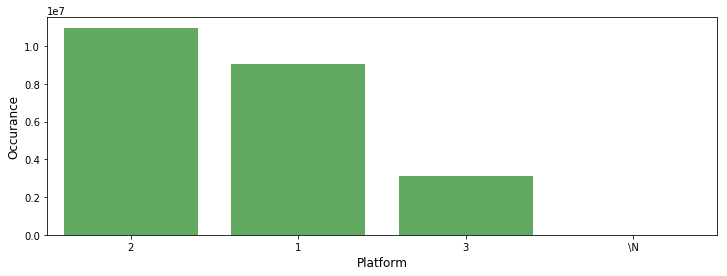

In [31]:
#plot
plt.figure( figsize= (12,4))
sns.barplot( platform_counts.index, platform_counts.values, alpha=0.8, color=p[2])
plt.xlabel('Platform', fontsize=12)
plt.ylabel("Occurance", fontsize=12)

In [ ]:
#Clear up Memory
try:del events
except:pass;gc.collect()

**events data set analysis**
1) Dataset has about 2.3e+7 rows
2) display_id, document_id are int values and timestamp is an epoch time from the start
3) uuid & geolocation is a alphanumeric
4) platform is alphanumeric though it should be categorical
5) platform is a special column where values are sometimes character or \N. We probably need to decide what to do with the missing columns and convert column values into standard categorical values
events.platform.unique()
array([3, 2, 1, '2', '1', '3', '\\N'], dtype=object)
events.groupby('platform').count()['display_id']
platform
1      8747280
2     10684579
3      3032907
1       279988
2       291699
3        83668
\N           5
6) Here data cleaning would be required
 a) Convert strings into int
 b) \N to 0
 c) convert all 3 into categorical values ( hot encoding ) [ todo]
 
7) geolocation has missing values [ todo ]

In [28]:
documents_meta = pd.read_csv(path + 'documents_meta.csv.zip', compression='zip', header=0, sep=',', quotechar='"')

In [29]:
print( documents_meta.head())
print( documents_meta.tail())
print( documents_meta.shape)
print( documents_meta.describe())
print( documents_meta.dtypes)

   document_id  source_id  publisher_id         publish_time
0      1595802        1.0         603.0  2016-06-05 00:00:00
1      1524246        1.0         603.0  2016-05-26 11:00:00
2      1617787        1.0         603.0  2016-05-27 00:00:00
3      1615583        1.0         603.0  2016-06-07 00:00:00
4      1615460        1.0         603.0  2016-06-20 00:00:00
         document_id  source_id  publisher_id publish_time
2999329      1112778        NaN           NaN          NaN
2999330      1108348        NaN           NaN          NaN
2999331      1121434        NaN           NaN          NaN
2999332      1092197        NaN           NaN          NaN
2999333      1107648        NaN           NaN          NaN
(2999334, 4)
        document_id     source_id  publisher_id
count  2.999334e+06  2.996816e+06  2.935310e+06
mean   1.499668e+06  3.670058e+03  5.041475e+02
std    8.658333e+05  3.462633e+03  3.477791e+02
min    1.000000e+00  1.000000e+00  2.000000e+00
25%    7.498342e+05  8.2100

In [30]:
#Find how many null values for each column
print("How many are null")
print( documents_meta.isnull().sum() )
print("\nCheck Cardinality")
print( "document_id:\t", len(documents_meta.document_id.unique()))
print( "source_id:\t",len(documents_meta.source_id.unique()))
print( "publisher_id:\t",len(documents_meta.publisher_id.unique()))
print( "publish_time:\t",len(documents_meta.publish_time.unique()))

How many are null
document_id           0
source_id          2518
publisher_id      64024
publish_time    1011118
dtype: int64

Check Cardinality
document_id:	 2999334
source_id:	 14395
publisher_id:	 1260
publish_time:	 49914


**Summary of document_meta dataset**
1) Shape of the data set if (2999334, 4)
2) Consists of 4 columns ( document_id, source_id, publisher_id and publish_time)
3) data set has nulls once we load in the data set we need to think how to handle nulls [ TODO ]
    
    document_id           0
    source_id          2518
    publisher_id      64024
    publish_time    1011118
    dtype: int64
Q: Not sure why source_id and published_id are showing up as float64 ? Is there a way to peakthe raw file ?

In [32]:
documents_topics = pd.read_csv(path + 'documents_topics.csv.zip', compression='zip', header=0, sep=',', quotechar='"')

In [33]:
print( documents_topics.head())
print( documents_topics.tail())
print( documents_topics.shape)
print( documents_topics.describe())
print( documents_topics.dtypes)

   document_id  topic_id  confidence_level
0      1595802       140          0.073113
1      1595802        16          0.059416
2      1595802       143          0.045421
3      1595802       170          0.038867
4      1524246       113          0.196450
          document_id  topic_id  confidence_level
11325955      1080024       221          0.010094
11325956      1125054        29          0.040381
11325957      1080122        29          0.038200
11325958      1291726        68          0.069515
11325959      1855422        99          0.076847
(11325960, 3)
        document_id      topic_id  confidence_level
count  1.132596e+07  1.132596e+07      1.132596e+07
mean   1.078615e+06  1.448378e+02      4.888786e-02
std    6.938215e+05  8.741227e+01      6.851409e-02
min    1.000000e+00  0.000000e+00      8.000000e-03
25%    4.988220e+05  6.600000e+01      1.317609e-02
50%    1.028890e+06  1.450000e+02      2.632861e-02
75%    1.549140e+06  2.190000e+02      5.284751e-02
max    2.999

In [36]:
#Find how many null values for each column
print("How many are null")
print(documents_topics.isnull().sum())
print("\nCheck Cardinality")
print( "document_id:\t\t", len(documents_topics.document_id.unique()))
print( "topic_id:\t\t",len(documents_topics.topic_id.unique()))
print( "confidence_level:\t",len(documents_topics.confidence_level.unique()))

How many are null
document_id         0
topic_id            0
confidence_level    0
dtype: int64

Check Cardinality
document_id:		 2495423
topic_id:		 300
confidence_level:	 10124758


**document_meta data set**
1) Simple table with int, int and float data types
2) no misisng values

In [37]:
documents_categories = pd.read_csv(path + 'documents_categories.csv.zip', compression='zip', header=0, sep=',', quotechar='"')

In [38]:
print( documents_categories.head())
print( documents_categories.tail())
print( documents_categories.shape)
print( documents_categories.describe())
print( documents_categories.dtypes)

   document_id  category_id  confidence_level
0      1595802         1611              0.92
1      1595802         1610              0.07
2      1524246         1807              0.92
3      1524246         1608              0.07
4      1617787         1807              0.92
         document_id  category_id  confidence_level
5481470       777861         1902          0.118806
5481471       599468         1902          0.257000
5481472       599468         1914          0.002000
5481473       774527         1914          0.117633
5481474       774527         2006          0.117633
(5481475, 3)
        document_id   category_id  confidence_level
count  5.481475e+06  5.481475e+06      5.481475e+06
mean   1.473338e+06  1.619857e+03      3.849750e-01
std    8.690233e+05  2.439657e+02      3.692307e-01
min    1.000000e+00  1.000000e+03      6.826424e-04
25%    7.282175e+05  1.407000e+03      5.728194e-02
50%    1.456181e+06  1.611000e+03      2.659611e-01
75%    2.223658e+06  1.808000e+03  

In [39]:
#Find how many null values for each column
print("How many are null")
print(documents_categories.isnull().sum())
print("\nCheck Cardinality")
print( "document_id:\t\t", len(documents_categories.document_id.unique()))
print( "category_id:\t\t",len(documents_categories.category_id.unique()))
print( "confidence_level:\t",len(documents_categories.confidence_level.unique()))

How many are null
document_id         0
category_id         0
confidence_level    0
dtype: int64

Check Cardinality
document_id:		 2828649
category_id:		 97
confidence_level:	 21900


In [41]:
documents_entities = pd.read_csv(path + 'documents_entities.csv.zip', compression='zip', header=0, sep=',', quotechar='"')

In [42]:
print( documents_entities.head())
print( documents_entities.tail())
print( documents_entities.shape)
print( documents_entities.describe())
print( documents_entities.dtypes)

   document_id                         entity_id  confidence_level
0      1524246  f9eec25663db4cd83183f5c805186f16          0.672865
1      1524246  55ebcfbdaff1d6f60b3907151f38527a          0.399114
2      1524246  839907a972930b17b125eb0247898412          0.392096
3      1524246  04d8f9a1ad48f126d5806a9236872604          0.213996
4      1617787  612a1d17685a498aff4f036c1ee02c16          0.386193
         document_id                         entity_id  confidence_level
5537547      1291726  346d9349f96af98c8a5092b0f6d6d952          0.297644
5537548      1291726  ea1da4c578e07a535e410a30eb1cc44a          0.295476
5537549      1855422  896ebce354e38fd15e1097336c97e030          0.882060
5537550      1855422  d6cd68db952c22040956f7590da13933          0.679703
5537551      1855422  8532f8f7668cc8db3621a305dba9e921          0.546878
(5537552, 3)
        document_id  confidence_level
count  5.537552e+06      5.537552e+06
mean   1.404345e+06      4.608689e-01
std    8.048950e+05      2.357502

In [43]:
#Find how many null values for each column
print("How many are null")
print(documents_entities.isnull().sum())
print("\nCheck Cardinality")
print( "document_id:\t\t", len(documents_entities.document_id.unique()))
print( "entity_id:\t\t",len(documents_entities.entity_id.unique()))
print( "confidence_level:\t",len(documents_entities.confidence_level.unique()))

How many are null
document_id         0
entity_id           0
confidence_level    0
dtype: int64

Check Cardinality
document_id:		 1791420
entity_id:		 1326009
confidence_level:	 2678533


In [45]:
promoted_content = pd.read_csv(path + 'promoted_content.csv.zip', compression='zip', header=0, sep=',', quotechar='"')

In [46]:
print( promoted_content.head())
print( promoted_content.tail())
print( promoted_content.shape)
print( promoted_content.describe())
print( promoted_content.dtypes)

   ad_id  document_id  campaign_id  advertiser_id
0      1         6614            1              7
1      2       471467            2              7
2      3         7692            3              7
3      4       471471            2              7
4      5       471472            2              7
         ad_id  document_id  campaign_id  advertiser_id
559578  572968      1375496        18617           3223
559579  573016      1051466        18617           3223
559580  573081       497486        18617           3223
559581  573094      2868067        18906            283
559582  573098      2790678        13933             16
(559583, 4)
               ad_id   document_id    campaign_id  advertiser_id
count  559583.000000  5.595830e+05  559583.000000  559583.000000
mean   281684.072783  1.445422e+06   17346.728637    1670.269672
std    162819.967811  5.644029e+05   11011.407136    1131.819570
min         1.000000  1.000000e+00       1.000000       2.000000
25%    140624.500000  1.089

In [49]:
#Find how many null values for each column
print("How many are null")
print( promoted_content.isnull().sum())
print("\nCheck Cardinality")
print( "document_id:\t", len(promoted_content.document_id.unique()))
print( "ad_id:\t\t",len(promoted_content.ad_id.unique()))
print( "campaign_id:\t",len(promoted_content.campaign_id.unique()))
print( "advertiser_id:\t",len(promoted_content.advertiser_id.unique()))

How many are null
ad_id            0
document_id      0
campaign_id      0
advertiser_id    0
dtype: int64

Check Cardinality
document_id:	 185709
ad_id:		 559583
campaign_id:	 34675
advertiser_id:	 4385


In [21]:
page_views_sample = pd.read_csv(path + 'page_views_sample.csv.zip', compression='zip', header=0, sep=',', quotechar='"')

In [22]:
print( page_views_sample.head())
print( page_views_sample.tail())
print( page_views_sample.shape)
print( page_views_sample.describe())
print( page_views_sample.dtypes)
#Find how many null values for each column
print( page_views_sample.isnull().sum())

             uuid  document_id  timestamp  platform geo_location  \
0  1fd5f051fba643          120   31905835         1           RS   
1  8557aa9004be3b          120   32053104         1        VN>44   
2  c351b277a358f0          120   54013023         1        KR>12   
3  8205775c5387f9          120   44196592         1        IN>16   
4  9cb0ccd8458371          120   65817371         1    US>CA>807   

   traffic_source  
0               2  
1               2  
2               1  
3               2  
4               2  
                   uuid  document_id  timestamp  platform geo_location  \
9999994  6d030f7faed197      1074029   18385176         1        US>AE   
9999995  1f1455bd16472a      1074029    6769506         1    US>CA>803   
9999996  3e0807264aac07      1074029   31216814         1        ZA>11   
9999997  eaca8029ad3bdd      1074029   26427117         1    US>NY>502   
9999998  66ae6786cc70a6      1074029   18387544         1        AU>02   

         traffic_source  


In [23]:
print(page_views_sample.uuid.str.len().max())
print(page_views_sample.geo_location.str.len().max())

14
9.0


In [106]:
sample_submission = pd.read_csv(path + 'sample_submission.csv.zip', compression='zip', header=0, sep=',', quotechar='"')

In [107]:
print( sample_submission.head())
print( sample_submission.tail())
print( sample_submission.shape)
print( sample_submission.describe())
print( sample_submission.dtypes)
#Find how many null values for each column
print( sample_submission.isnull().sum())

   display_id                                              ad_id
0    16874594           66758 150083 162754 170392 172888 180797
1    16874595                                  8846 30609 143982
2    16874596  11430 57197 132820 153260 173005 288385 289122...
3    16874597  137858 143981 155945 180965 182039 285834 3057...
4    16874598                         67292 145937 250082 335632
         display_id                                              ad_id
6245528    23120122  5579 54979 95103 148268 166840 281183 386922 5...
6245529    23120123                        174045 208244 471443 516264
6245530    23120124                         83252 162994 173403 489589
6245531    23120125                          86281 89725 187797 254698
6245532    23120126                         57097 145293 201649 292363
(6245533, 2)
         display_id
count  6.245533e+06
mean   1.999736e+07
std    1.802930e+06
min    1.687459e+07
25%    1.843598e+07
50%    1.999736e+07
75%    2.155874e+07
max    2.31

In [108]:
print(sample_submission.ad_id.str.len().max())

83
